In [1]:
%load_ext rpy2.ipython

In [9]:
%%R
library(dplyr)
library(ggplot2)
library(scales)
library(alakazam)
library(shazam)

In [3]:
%%R
db <- readChangeoDb("SRX190717_small_db-pass_clone-pass_germ-pass.tab")

In [4]:
%%R
names(db)

 [1] "MID"                  "RUN"                  "SEQUENCE_ID"         
 [4] "SEQUENCE_INPUT"       "FUNCTIONAL"           "IN_FRAME"            
 [7] "STOP"                 "MUTATED_INVARIANT"    "INDELS"              
[10] "V_CALL"               "D_CALL"               "J_CALL"              
[13] "SEQUENCE_VDJ"         "SEQUENCE_IMGT"        "V_SEQ_START"         
[16] "V_SEQ_LENGTH"         "V_GERM_START_VDJ"     "V_GERM_LENGTH_VDJ"   
[19] "V_GERM_START_IMGT"    "V_GERM_LENGTH_IMGT"   "NP1_LENGTH"          
[22] "D_SEQ_START"          "D_SEQ_LENGTH"         "D_GERM_START"        
[25] "D_GERM_LENGTH"        "NP2_LENGTH"           "J_SEQ_START"         
[28] "J_SEQ_LENGTH"         "J_GERM_START"         "J_GERM_LENGTH"       
[31] "JUNCTION_LENGTH"      "JUNCTION"             "V_SCORE"             
[34] "V_IDENTITY"           "V_EVALUE"             "V_BTOP"              
[37] "J_SCORE"              "J_IDENTITY"           "J_EVALUE"            
[40] "J_BTOP"               "HMM_SCORE

In [5]:
%%R
db <- aminoAcidProperties(db, seq="JUNCTION", nt=TRUE, trim=TRUE, label="CDR3")
dplyr::select(db[1:3, ], starts_with("CDR3"))

                                CDR3_IMGT CDR3_AA_LENGTH CDR3_AA_GRAVY
1 GCAAGAGATAGCAGCAGCTGGCACTGGAACTTCGATCTC             13    -1.0769231
2       GTCAGGGAGCGAGGACGATATCACTTTGACTAC             11    -1.7909091
3    GCGGTCGAGAAGGGTATAGCAGCAGCTGGTTCTTTA             12     0.8916667
  CDR3_AA_BULK CDR3_AA_ALIPHATIC CDR3_AA_POLARITY CDR3_AA_CHARGE CDR3_AA_BASIC
1     14.50769         0.3769231         8.853846  -0.8875599178    0.15384615
2     14.78273         0.2636364         9.063636   1.1086264257    0.36363636
3     12.99333         1.2250000         8.266667   0.0001029874    0.08333333
  CDR3_AA_ACIDIC CDR3_AA_AROMATIC
1     0.15384615        0.3076923
2     0.18181818        0.3636364
3     0.08333333        0.0000000


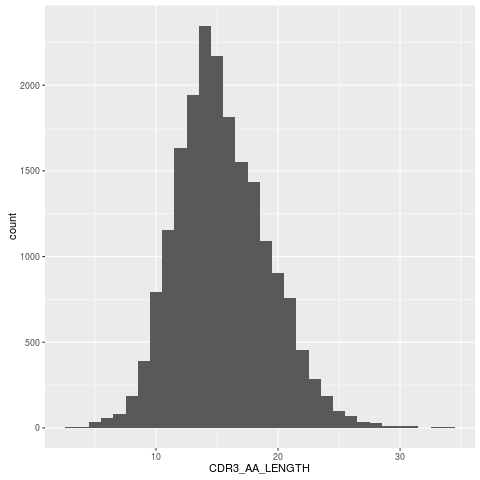

In [6]:
%%R
ggplot(db,aes(x=CDR3_AA_LENGTH))+geom_histogram(binwidth=1)

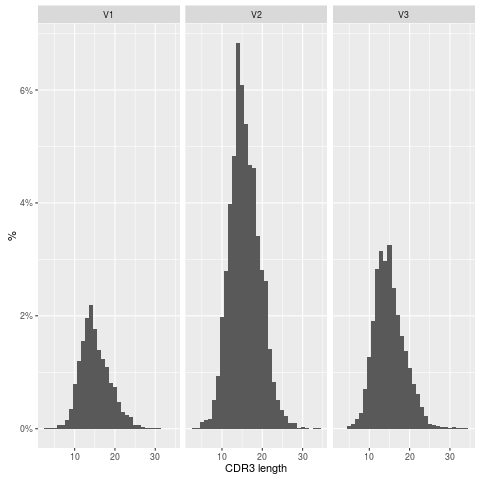

In [15]:
%%R
ggplot(db,aes(x=CDR3_AA_LENGTH))+geom_histogram(aes(y=..count../sum(..count..)),binwidth=1)+
 facet_wrap(~VISIT)+
 scale_y_continuous(labels=percent_format())+
 xlab("CDR3 length")+
 ylab("%")

In [16]:
%%R
clones <- countClones(db, groups=c("VISIT"),copy="DUPCOUNT")
head(clones, 5)

Source: local data frame [5 x 6]
Groups: VISIT [2]

  VISIT CLONE SEQ_COUNT COPY_COUNT     SEQ_FREQ   COPY_FREQ
  <chr> <chr>     <int>      <int>        <dbl>       <dbl>
1    V2 12560         4        627 0.0003681207 0.011063860
2    V3 10864         6        558 0.0011115228 0.023075969
3    V2  2256         7        533 0.0006442113 0.009405163
4    V2  6586        26        434 0.0023927848 0.007658238
5    V2 13794        13        430 0.0011963924 0.007587655


In [19]:
%%R
clonalabundance <- estimateAbundance(db, group="VISIT", ci=0.95, nboot=200)
head(clonalabundance,5)


# A tibble: 5 × 6
  GROUP CLONE           P        LOWER       UPPER  RANK
  <chr> <chr>       <dbl>        <dbl>       <dbl> <int>
1    V1 12324 0.005164033 0.0024998197 0.007828247     1
2    V1  4037 0.003645145 0.0014935803 0.005796710     2
3    V1  1318 0.003341296 0.0014515860 0.005231005     3
4    V1  5293 0.002733065 0.0010423039 0.004423827     4
5    V1 10225 0.002428116 0.0006341419 0.004222090     5


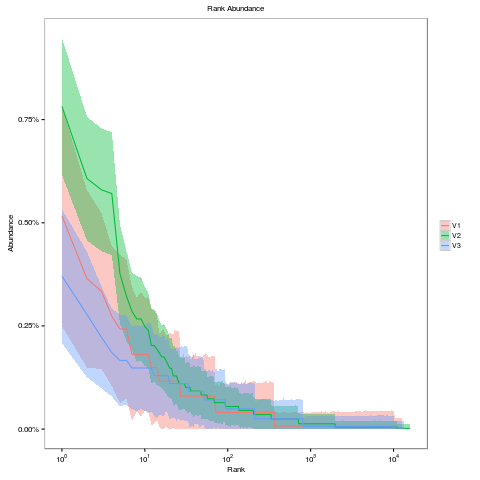

In [21]:
%%R
plotAbundance(clonalabundance)

In [22]:
%%R
sample_div <- rarefyDiversity(db, "VISIT", min_q=0, max_q=32, step_q=0.05, 
                                 ci=0.95, nboot=200)

In [ ]:
%%R
plotDiversityCurve(sample_div,legend_title="Visit", log_q=TRUE, log_d=TRUE)

In [23]:
%%R
sub_db <- subset(db, CLONE == 6586)
clone <- makeChangeoClone(sub_db, text_fields=c("VISIT"), 
                          num_fields="DUPCOUNT")
clone@data[, c("VISIT", "DUPCOUNT")]

   VISIT DUPCOUNT
1     V3        2
2     V2        2
3     V2        2
4     V2        2
5     V2        2
6     V2       57
7     V2        2
8     V2        2
9     V2        5
10    V2       34
11    V2        2
12    V2        5
13    V2        2
14    V2        2
15    V2        5
16    V2       22
17    V2       10
18    V2       33
19    V2      210
20    V2       35


In [ ]:
%%R
